In [5]:
import torch
import numpy as np

In [6]:
x_np = np.array(5.0)
x_np

array(5.)

In [11]:
x = torch.tensor(x_np, requires_grad=True)
x

tensor(5., dtype=torch.float64, requires_grad=True)

In [12]:
y = 3 * x**2
y

tensor(75., dtype=torch.float64, grad_fn=<MulBackward0>)

In [13]:
y.backward()
x.grad

tensor(30., dtype=torch.float64)

In [15]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

a = torch.tensor(a, requires_grad=False)
b = torch.tensor(b, requires_grad=False)

c = torch.dot(a, b)
print(c)

tensor(32)


In [16]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])  

c = torch.mm(torch.tensor(a), torch.tensor(b))
c

tensor([[19, 22],
        [43, 50]])

In [17]:
def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (1 - x0) ** 2
    return y

In [18]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [19]:
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

lr = 0.001
iters = 10_000

for _ in range(iters):
    print(x0, x1)
    y = rosenbrock(x0, x1)

    x0.grad = None
    x1.grad = None
    y.backward()

    x0.data -= lr * x0.grad
    x1.data -= lr * x1.grad


print(x0, x1)

tensor(0., requires_grad=True) tensor(2., requires_grad=True)
tensor(0.0020, requires_grad=True) tensor(1.6000, requires_grad=True)
tensor(0.0053, requires_grad=True) tensor(1.2800, requires_grad=True)
tensor(0.0100, requires_grad=True) tensor(1.0240, requires_grad=True)
tensor(0.0160, requires_grad=True) tensor(0.8192, requires_grad=True)
tensor(0.0232, requires_grad=True) tensor(0.6554, requires_grad=True)
tensor(0.0313, requires_grad=True) tensor(0.5245, requires_grad=True)
tensor(0.0398, requires_grad=True) tensor(0.4198, requires_grad=True)
tensor(0.0484, requires_grad=True) tensor(0.3361, requires_grad=True)
tensor(0.0567, requires_grad=True) tensor(0.2694, requires_grad=True)
tensor(0.0646, requires_grad=True) tensor(0.2161, requires_grad=True)
tensor(0.0720, requires_grad=True) tensor(0.1737, requires_grad=True)
tensor(0.0787, requires_grad=True) tensor(0.1400, requires_grad=True)
tensor(0.0848, requires_grad=True) tensor(0.1133, requires_grad=True)
tensor(0.0902, requires_grad

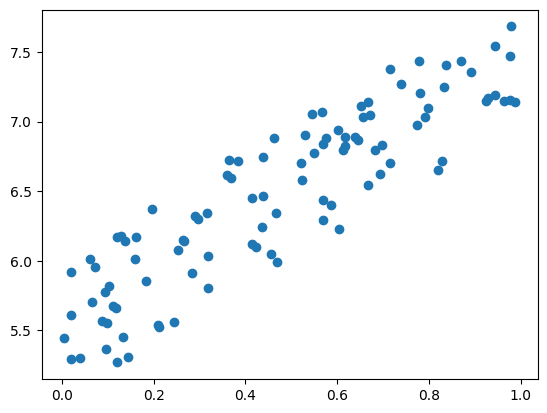

In [44]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)

import matplotlib.pyplot as plt

plt.plot(x, y, 'o')

In [45]:
x = torch.tensor(x, dtype=torch.float32, requires_grad=False)
y = torch.tensor(y, dtype=torch.float32, requires_grad=False)

w = torch.tensor(np.zeros((1, 1)), dtype=torch.float32, requires_grad=True)
b = torch.tensor(np.zeros(1), dtype=torch.float32, requires_grad=True)

In [46]:
def predict(x):
    y = torch.mm(x, w) + b
    return y

In [47]:
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return torch.sum(diff ** 2) / diff.numel()

In [48]:
lr = 0.1
iters = 100
for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    w.grad = None
    b.grad = None
    loss.backward()

    w.data -= lr * w.grad
    b.data -= lr * b.grad

    if i % 10 == 0:
        print(loss)

print(f"{w=}, {b=}")

tensor(42.2963, grad_fn=<DivBackward0>)
tensor(0.2492, grad_fn=<DivBackward0>)
tensor(0.1008, grad_fn=<DivBackward0>)
tensor(0.0946, grad_fn=<DivBackward0>)
tensor(0.0903, grad_fn=<DivBackward0>)
tensor(0.0869, grad_fn=<DivBackward0>)
tensor(0.0844, grad_fn=<DivBackward0>)
tensor(0.0825, grad_fn=<DivBackward0>)
tensor(0.0810, grad_fn=<DivBackward0>)
tensor(0.0799, grad_fn=<DivBackward0>)
w=tensor([[2.1181]], requires_grad=True), b=tensor([5.4661], requires_grad=True)


In [30]:
b.grad

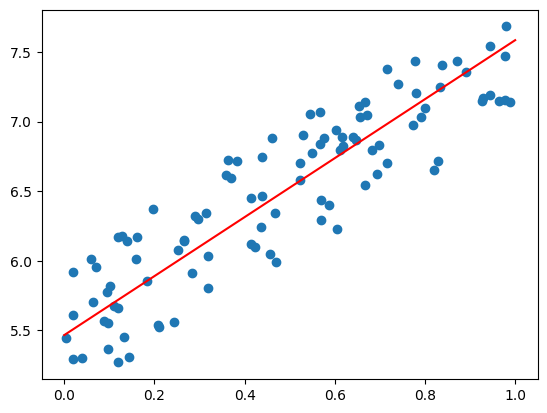

In [53]:
xx = np.linspace(0, 1, 100).reshape(-1, 1)
yy = predict(torch.tensor(xx, dtype=torch.float32))

# reshape to 1D
yy = yy.detach().numpy().ravel()

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')

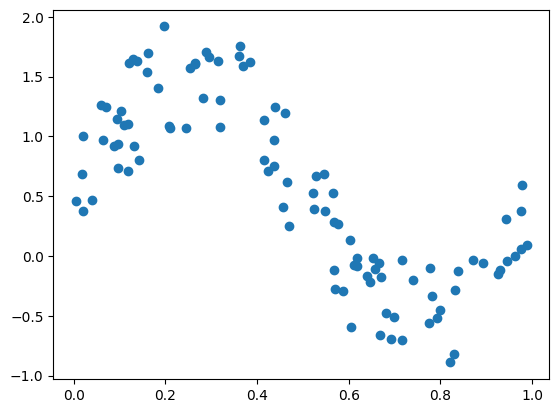

In [56]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

plt.plot(x, y, 'o')

In [57]:
# do mm(x, w) + b in one line using function.linear()
_ = torch.nn.functional.linear(torch.tensor(x, dtype=torch.float32), w, b)
_

tensor([[6.6285],
        [6.9809],
        [6.7428],
        [6.6202],
        [6.3634],
        [6.8341],
        [6.3929],
        [7.3549],
        [7.5072],
        [6.2782],
        [7.1430],
        [6.5863],
        [6.6692],
        [7.4266],
        [5.6165],
        [5.6506],
        [5.5089],
        [7.2296],
        [7.1143],
        [7.3088],
        [7.5389],
        [7.1588],
        [6.4435],
        [7.1193],
        [5.7166],
        [6.8215],
        [5.7697],
        [7.4670],
        [6.5714],
        [6.3444],
        [6.0264],
        [7.1060],
        [6.4322],
        [6.6701],
        [5.5059],
        [6.7743],
        [6.7626],
        [6.7728],
        [7.4650],
        [6.9102],
        [6.2276],
        [6.3918],
        [6.9437],
        [5.5937],
        [6.8784],
        [6.8865],
        [5.9117],
        [5.7392],
        [6.1342],
        [6.2365],
        [6.6738],
        [6.3951],
        [7.5595],
        [5.6822],
        [5.9085],
        [5

In [32]:
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# Convert to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

I, H, O = 1, 10, 1
w1 = torch.randn(H, I ,requires_grad=True)
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True)
b2 = torch.zeros(O, requires_grad=True)

def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

lr = 0.2
iters = 10_000

for i in range(iters):
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    loss.backward()

    # Update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Clear gradients
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    if i % 1000 == 0:
        print(loss.data)



tensor(1.9009)
tensor(0.2784)
tensor(0.2748)
tensor(0.2677)
tensor(0.2502)
tensor(0.1959)
tensor(0.1174)
tensor(0.1066)
tensor(0.0967)
tensor(0.0941)


In [109]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Training loop
for i in range(iters):
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Clear gradients
    if w1.grad is not None:
        w1.grad.zero_()
    if b1.grad is not None:
        b1.grad.zero_()
    if w2.grad is not None:
        w2.grad.zero_()
    if b2.grad is not None:
        b2.grad.zero_()

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(loss.item())


/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/1311357904.py:36: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  if w1.grad is not None:
/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/1311357904.py:40: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [110]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Training loop
for i in range(iters):
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Clear gradients
    w1.grad = None
    b1.grad = None
    w2.grad = None
    b2.grad = None

    # Backward pass
    loss.backward()

    # Ensure gradients are not None
    if w1.grad is None or b1.grad is None or w2.grad is None or b2.grad is None:
        raise ValueError("Gradients were not computed. Check your computation graph.")

    # Update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(loss.item())


/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/3986291085.py:45: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  if w1.grad is None or b1.grad is None or w2.grad is None or b2.grad is None:


ValueError: Gradients were not computed. Check your computation graph.

In [111]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Training loop
for i in range(iters):
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Clear gradients
    if w1.grad is not None:
        w1.grad.zero_()
    if b1.grad is not None:
        b1.grad.zero_()
    if w2.grad is not None:
        w2.grad.zero_()
    if b2.grad is not None:
        b2.grad.zero_()

    # Backward pass
    loss.backward()

    # Update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: loss = {loss.item()}")

print(f"Final loss: {loss.item()}")


/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/951468058.py:36: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  if w1.grad is not None:
/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/951468058.py:40: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf T

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [112]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Training loop
for i in range(iters):
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Clear gradients
    w1.grad = None
    b1.grad = None
    w2.grad = None
    b2.grad = None

    # Backward pass
    loss.backward()

    # Ensure gradients are not None
    if w1.grad is None or b1.grad is None or w2.grad is None or b2.grad is None:
        raise ValueError("Gradients were not computed. Check your computation graph.")

    # Update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: loss = {loss.item()}")

print(f"Final loss: {loss.item()}")


/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/1285172891.py:45: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  if w1.grad is None or b1.grad is None or w2.grad is None or b2.grad is None:


ValueError: Gradients were not computed. Check your computation graph.

In [113]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, requires_grad=False)
y = torch.tensor(y, requires_grad=False)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Training loop
for i in range(iters):
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Clear gradients using recommended approach
    w1.grad = None
    b1.grad = None
    w2.grad = None
    b2.grad = None

    # Backward pass
    loss.backward()

    # Ensure gradients are computed
    if w1.grad is None or b1.grad is None or w2.grad is None or b2.grad is None:
        raise ValueError("Gradients were not computed. Check your computation graph.")

    # Update weights
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: loss = {loss.item()}")

print(f"Final loss: {loss.item()}")


/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_57650/1822995490.py:45: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  if w1.grad is None or b1.grad is None or w2.grad is None or b2.grad is None:


ValueError: Gradients were not computed. Check your computation graph.

In [1]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, requires_grad=False)
y = torch.tensor(y, requires_grad=False)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Optimizer setup (Using PyTorch's built-in optimizers for better practice)
optimizer = torch.optim.SGD([w1, b1, w2, b2], lr=lr)

# Training loop
for i in range(iters):
    # Reset gradients
    optimizer.zero_grad()

    # Forward pass
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: loss = {loss.item()}")

print(f"Final loss: {loss.item()}")


ValueError: can't optimize a non-leaf Tensor

In [2]:
import numpy as np
import torch

# Generate data
x = np.random.rand(100, 1).astype(np.float32)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1).astype(np.float32)

# Convert to PyTorch tensors
x = torch.tensor(x, requires_grad=False)
y = torch.tensor(y, requires_grad=False)

# Network parameters
I, H, O = 1, 10, 1
w1 = torch.randn(H, I, requires_grad=True) * 0.01
b1 = torch.zeros(H, requires_grad=True)
w2 = torch.randn(O, H, requires_grad=True) * 0.01
b2 = torch.zeros(O, requires_grad=True)

# Ensure the tensors are leaf nodes
assert w1.is_leaf and b1.is_leaf and w2.is_leaf and b2.is_leaf, "Parameters must be leaf tensors"

# Predict function
def predict(x):
    x = torch.nn.functional.linear(x, w1, b1)
    x = torch.sigmoid(x)
    x = torch.nn.functional.linear(x, w2, b2)
    return x

# Training parameters
lr = 0.2
iters = 10000

# Optimizer setup (Using PyTorch's built-in optimizers for better practice)
optimizer = torch.optim.SGD([w1, b1, w2, b2], lr=lr)

# Training loop
for i in range(iters):
    # Reset gradients
    optimizer.zero_grad()

    # Forward pass
    y_pred = predict(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    # Print loss every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: loss = {loss.item()}")

print(f"Final loss: {loss.item()}")


AssertionError: Parameters must be leaf tensors

In [10]:
np.random.randn(H, O).shape

(10, 1)

In [12]:
torch.randn(H, O)

tensor([[ 0.0025],
        [-0.7599],
        [-0.3869],
        [-1.5650],
        [-1.5845],
        [ 0.3794],
        [ 0.4465],
        [-0.1978],
        [-0.2981],
        [ 0.6794]])

In [13]:
import torch
import torch.nn.functional as F
import numpy as np

# Generate synthetic data: assume input feature size I = 1 for simplicity
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = (3 * x + 2 + np.random.randn(*x.shape) * 0.1).repeat(10, axis=1)  # Now y has 10 output features

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# Define network dimensions
I, H, O = 1, 10, 1  # Input size, hidden size, output size

# Initialize weights and biases for the hidden and output layers
w1 = torch.randn(I, H, requires_grad=True)  # Weight for hidden layer
b1 = torch.zeros(H, requires_grad=True)     # Bias for hidden layer
w2 = torch.randn(H, O, requires_grad=True)  # Weight for output layer
b2 = torch.zeros(O, requires_grad=True)     # Bias for output layer

# Training parameters
lr = 0.01  # Learning rate
epochs = 2000  # Number of iterations over the entire dataset

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden = torch.mm(x_tensor, w1) + b1  # Linear transformation
    hidden_activation = torch.relu(hidden)  # Non-linear activation function
    y_pred = torch.mm(hidden_activation, w2) + b2  # Output layer

    # Compute the loss (Mean Squared Error)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    # Backward pass (compute gradients)
    loss.backward()

    # Update parameters (w1, b1, w2, b2)
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')

print(f'Final model output: y = mm(relu(mm(x, w1) + b1), w2) + b2')


Epoch 1: loss = 6.4842
Epoch 101: loss = 0.0344
Epoch 201: loss = 0.0327
Epoch 301: loss = 0.0313
Epoch 401: loss = 0.0299
Epoch 501: loss = 0.0286
Epoch 601: loss = 0.0270
Epoch 701: loss = 0.0255
Epoch 801: loss = 0.0240
Epoch 901: loss = 0.0226
Epoch 1001: loss = 0.0214
Epoch 1101: loss = 0.0203
Epoch 1201: loss = 0.0193
Epoch 1301: loss = 0.0185
Epoch 1401: loss = 0.0180
Epoch 1501: loss = 0.0174
Epoch 1601: loss = 0.0168
Epoch 1701: loss = 0.0164
Epoch 1801: loss = 0.0159
Epoch 1901: loss = 0.0155
Final model output: y = mm(relu(mm(x, w1) + b1), w2) + b2


In [14]:
import torch
import torch.nn.functional as F
import numpy as np

# Generate synthetic data: assume input feature size I = 1 for simplicity
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = (3 * x + 2 + np.random.randn(*x.shape) * 0.1).repeat(10, axis=1)  # Now y has 10 output features

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# Define network dimensions
I, H, O = 1, 10, 10  # Input size, hidden size, output size

# Initialize weights and biases for the hidden and output layers
w1 = torch.randn(I, H, requires_grad=True)  # Weight for hidden layer
b1 = torch.zeros(H, requires_grad=True)     # Bias for hidden layer
w2 = torch.randn(H, O, requires_grad=True)  # Weight for output layer
b2 = torch.zeros(O, requires_grad=True)     # Bias for output layer

# Predict function using PyTorch's functional API for linear layers
def predict(x):
    hidden = F.linear(x, w1, b1)  # Apply linear transformation to the hidden layer
    hidden_activation = torch.relu(hidden)  # Apply ReLU activation function
    output = F.linear(hidden_activation, w2, b2)  # Apply linear transformation to the output layer
    return output

# Training parameters
lr = 0.01  # Learning rate
epochs = 2000  # Number of iterations over the entire dataset

# Training loop
for epoch in range(epochs):
    # Forward pass by calling the predict function
    y_pred = predict(x_tensor)

    # Compute the loss (Mean Squared Error)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    # Backward pass (compute gradients)
    loss.backward()

    # Update parameters (w1, b1, w2, b2)
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')

print(f'Final model output: y = predict(x_tensor)')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 10x1)

In [15]:
import torch
import torch.nn.functional as F
import numpy as np

# Generate synthetic data: assume input feature size I = 1 for simplicity
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = (3 * x + 2 + np.random.randn(*x.shape) * 0.1).repeat(10, axis=1)  # Now y has 10 output features

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# Define network dimensions
I, H, O = 1, 10, 10  # Input size, hidden size, output size

# Initialize weights and biases for the hidden and output layers
w1 = torch.randn(I, H, requires_grad=True)  # Weight for hidden layer, corrected dimensions
b1 = torch.zeros(H, requires_grad=True)     # Bias for hidden layer
w2 = torch.randn(H, O, requires_grad=True)  # Weight for output layer, correct dimensions
b2 = torch.zeros(O, requires_grad=True)     # Bias for output layer

# Predict function using PyTorch's functional API for linear layers
def predict(x):
    hidden = F.linear(x, w1, b1)  # Apply linear transformation to the hidden layer
    hidden_activation = torch.relu(hidden)  # Apply ReLU activation function
    output = F.linear(hidden_activation, w2, b2)  # Apply linear transformation to the output layer
    return output

# Training parameters
lr = 0.01  # Learning rate
epochs = 2000  # Number of iterations over the entire dataset

# Training loop
for epoch in range(epochs):
    # Forward pass by calling the predict function
    y_pred = predict(x_tensor)

    # Compute the loss (Mean Squared Error)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    # Backward pass (compute gradients)
    loss.backward()

    # Update parameters (w1, b1, w2, b2)
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')

print(f'Final model output: y = predict(x_tensor)')


RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 10x1)

In [16]:
F.linear?

Docstring:
linear(input, weight, bias=None) -> Tensor

Applies a linear transformation to the incoming data: :math:`y = xA^T + b`.

This operation supports 2-D :attr:`weight` with :ref:`sparse layout<sparse-docs>`


.. warning::
    Sparse support is a beta feature and some layout(s)/dtype/device combinations may not be supported,
    or may not have autograd support. If you notice missing functionality please
    open a feature request.

This operator supports :ref:`TensorFloat32<tf32_on_ampere>`.

Shape:

    - Input: :math:`(*, in\_features)` where `*` means any number of
      additional dimensions, including none
    - Weight: :math:`(out\_features, in\_features)` or :math:`(in\_features)`
    - Bias: :math:`(out\_features)` or :math:`()`
    - Output: :math:`(*, out\_features)` or :math:`(*)`, based on the shape of the weight
Type:      builtin_function_or_method

In [17]:
w1.T

tensor([[-0.0360],
        [-0.3909],
        [ 1.0428],
        [-0.6422],
        [-0.1067],
        [ 1.2623],
        [ 0.7116],
        [-0.5823],
        [-0.0905],
        [-0.2472]], grad_fn=<PermuteBackward0>)

In [18]:
import torch
import torch.nn.functional as F
import numpy as np

# Generate synthetic data: assume input feature size I = 1 for simplicity
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = (3 * x + 2 + np.random.randn(*x.shape) * 0.1).repeat(10, axis=1)  # Now y has 10 output features

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# Define network dimensions
I, H, O = 1, 10, 1  # Input size, hidden size, output size

# Initialize weights and biases for the hidden and output layers
w1 = torch.randn(I, H, requires_grad=True)  # Weight for hidden layer, corrected dimensions
b1 = torch.zeros(H, requires_grad=True)     # Bias for hidden layer
w2 = torch.randn(H, O, requires_grad=True)  # Weight for output layer, correct dimensions
b2 = torch.zeros(O, requires_grad=True)     # Bias for output layer

# Predict function using PyTorch's functional API for linear layers
def predict(x):
    hidden = F.linear(x, w1.T, b1)  # Apply linear transformation to the hidden layer
    hidden_activation = torch.relu(hidden)  # Apply ReLU activation function
    output = F.linear(hidden_activation, w2.T, b2)  # Apply linear transformation to the output layer
    return output

# Training parameters
lr = 0.01  # Learning rate
epochs = 2000  # Number of iterations over the entire dataset

# Training loop
for epoch in range(epochs):
    # Forward pass by calling the predict function
    y_pred = predict(x_tensor)

    # Compute the loss (Mean Squared Error)
    loss = torch.mean((y_pred - y_tensor) ** 2)

    # Backward pass (compute gradients)
    loss.backward()

    # Update parameters (w1, b1, w2, b2)
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')

print(f'Final model output: y = predict(x_tensor)')


Epoch 1: loss = 1.4372
Epoch 101: loss = 0.2337
Epoch 201: loss = 0.1012
Epoch 301: loss = 0.0517
Epoch 401: loss = 0.0329
Epoch 501: loss = 0.0241
Epoch 601: loss = 0.0198
Epoch 701: loss = 0.0176
Epoch 801: loss = 0.0166
Epoch 901: loss = 0.0160
Epoch 1001: loss = 0.0157
Epoch 1101: loss = 0.0155
Epoch 1201: loss = 0.0153
Epoch 1301: loss = 0.0151
Epoch 1401: loss = 0.0150
Epoch 1501: loss = 0.0149
Epoch 1601: loss = 0.0148
Epoch 1701: loss = 0.0146
Epoch 1801: loss = 0.0145
Epoch 1901: loss = 0.0144
Final model output: y = predict(x_tensor)


In [30]:
import torch
import torch.nn.functional as F
import numpy as np

# Generate synthetic data: assume input feature size I = 1 for simplicity
np.random.seed(0)
x = np.linspace(-1, 1, 100).reshape(-1, 1).astype(np.float32)
y = (3 * x + 2 + np.random.randn(*x.shape) * 0.1).astype(np.float32)

# Convert numpy arrays to PyTorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)

# Define network dimensions
I, H, O = 1, 10, 1  # Input size, hidden size, output size

# Initialize weights and biases for the hidden and output layers
w1 = torch.randn(H, I, requires_grad=True)  # Corrected weight dimensions for hidden layer
b1 = torch.zeros(H, requires_grad=True)     # Bias for hidden layer
w2 = torch.randn(O, H, requires_grad=True)  # Corrected weight dimensions for output layer
b2 = torch.zeros(O, requires_grad=True)     # Bias for output layer

# Predict function using PyTorch's functional API for linear layers
def predict(x):
    hidden = F.linear(x, w1, b1)  # Apply linear transformation to the hidden layer
    hidden_activation = torch.relu(hidden)  # Apply ReLU activation function
    output = F.linear(hidden_activation, w2, b2)  # Apply linear transformation to the output layer
    return output

# Training parameters
lr = 0.01  # Learning rate
epochs = 2000  # Number of iterations over the entire dataset

# Training loop
for epoch in range(epochs):
    # Forward pass by calling the predict function
    y_pred = predict(x_tensor)

    # Compute the loss (Mean Squared Error)
    # loss = torch.mean((y_pred - y_tensor) ** 2)
    loss = F.mse_loss(y_pred, y_tensor)

    # Backward pass (compute gradients)
    loss.backward()

    # Update parameters (w1, b1, w2, b2)
    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')

print(f'Final model output: y = predict(x_tensor)')


Epoch 1: loss = 3.7132
Epoch 101: loss = 0.0651
Epoch 201: loss = 0.0214
Epoch 301: loss = 0.0130
Epoch 401: loss = 0.0109
Epoch 501: loss = 0.0100
Epoch 601: loss = 0.0096
Epoch 701: loss = 0.0092
Epoch 801: loss = 0.0090
Epoch 901: loss = 0.0088
Epoch 1001: loss = 0.0087
Epoch 1101: loss = 0.0087
Epoch 1201: loss = 0.0087
Epoch 1301: loss = 0.0086
Epoch 1401: loss = 0.0086
Epoch 1501: loss = 0.0086
Epoch 1601: loss = 0.0086
Epoch 1701: loss = 0.0086
Epoch 1801: loss = 0.0086
Epoch 1901: loss = 0.0086
Final model output: y = predict(x_tensor)


tensor([[ 0.2507],
        [-0.1395],
        [ 2.0978],
        [ 0.7102],
        [-2.3691],
        [-0.5810],
        [-1.5670],
        [ 0.3785],
        [-0.4099],
        [ 0.3619]], requires_grad=True)